In [8]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
from matplotlib.colors import ListedColormap  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix  
import seaborn as sns


In [2]:
data = pd.read_csv('Data-PR-As2/Genes/data.csv')
labels = pd.read_csv('Data-PR-As2/Genes/labels.csv')

labels = labels.drop(labels='Unnamed: 0', axis=1)
data = data.drop(labels='Unnamed: 0', axis=1)

In [3]:
# https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

knn= KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)  

c:\Users\polyx\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

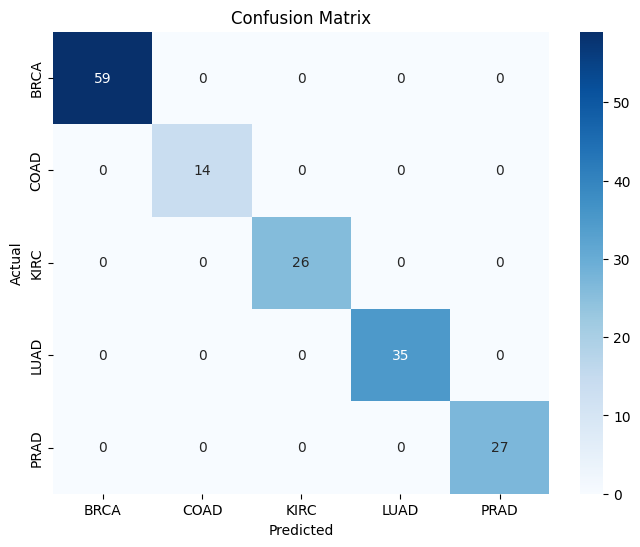

In [9]:

y_pred = knn.predict(X_test)

cm= confusion_matrix(y_test, y_pred) 

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()